#**Ciencia de Datos Aplicada MINE-4101 - TALLER 2**
Univerisdad de los Andes  
Realizado por: Yeimy A. Cano M.

# **0. Importación de librerias de trabajo**

Primero se procede a hacer la importación de librerías para poder trabajar con los datos y poder realizar el análisis.

In [192]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [193]:
!pip install pylev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [231]:
import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport

import seaborn as sns
from scipy import stats
import scipy
import statsmodels.api as sm

#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures , OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 110    
import pylev

In [195]:
!python --version
print('NumPy', np.__version__)
print('pandas', pd.__version__)
print('SciPy', scipy.__version__)
print('statsmodels', sm.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)


Python 3.7.14
NumPy 1.21.6
pandas 1.3.5
SciPy 1.7.3
statsmodels 0.13.2
Matplotlib 3.2.2
Seaborn 0.11.2


# **Entendimiento del Negocio**




## **a. Objetivos del negocio y situación actual.** 

La alcaldía de una ciudad está interesada en implementar un nuevo servicio de patinetas para incentivar la movilidad sostenible. Como parte de este proceso, se encuentra evaluando la viabilidad económica e impacto de dicho servicio

*   El objetivo es la  construcción de un modelo que permita predecir la demanda de patinetas al día con base en los datos de una ciudad vecina. 
*   Construir el mejor modelo de regresión que permita predecir el número de usuarios promedio por día del nuevo servicio, y poder entender la importancia y relación de las variables consideradas.

# **Entendimiento de los datos**

## **a. Adquisición e integración de datos.**

El archivo de datos está como archivo de CSV, separado por ';'

Para trabajar con los datos, éstos se ubican en la misma carpeta de github para entrega del prente taller.

In [196]:
# Loading data
url = 'https://raw.githubusercontent.com/yacanom/CDA_MINE-4101_repo/main/Taller%202/Data_Taller_2.csv'
data = pd.read_csv(url, sep=';', decimal=',', parse_dates=['Date'], dayfirst=True)

In [197]:
data.head(10)

instant        Date    Season Holiday               Weather      Temp  \
0        1   1/01/2020  Springer      No         Mist + Cloudy  8.175849   
1        2   2/01/2020  Springer      No         Mist + Cloudy  9.083466   
2        3   3/01/2020  Springer      No            Few clouds  1.229108   
3        4   4/01/2020  Springer      No            Few clouds  1.400000   
4        5   5/01/2020  Springer      No      Partly    cloudy  2.666979   
5        6   6/01/2020  Springer      No                 Clear  1.604356   
6        7   7/01/2020  Springer      No                  Mist  1.236534   
7        8   8/01/2020  Springer      No  Mist + Broken clouds -0.245000   
8        9   9/01/2020  Springer      No         Partly cloudy -1.498349   
9       10  10/01/2020  Springer      No      Partly    cloudy -0.910849   

   Feel_Temp       Hum       Wind  Casual  Registered   cnt  
0   9.090375  0.805833  10.749882     331         654   985  
1   8.625733  0.696087 -16.652113     131         670   801  
2   0.902035  0.437273  16.636703     120        1229  1349  
3   1.969734  0.590435  10.739832     108        1454  1562  
4   2.775690  0.436957  12.522300      82        1518  1600  
5   2.960823  0.518261   6.000868      88        1518  1606  
6   1.815433  0.498696  11.304642     148        1362  1510  
7  -0.374062  0.535833  17.875868      68         891   959  
8  -2.539775  0.434167  24.250650      54         768   822  
9  -0.908264  0.482917  14.958889      41        1280  1321

## **b. Diccionario de datos.**

De acuerdo a la información entregada, el set de datos cuentan con los siguientes columnas con la respectiva descripción:

| Field | Description| 
| --- | --- |
| Instant|  Record Index |
| Date|  Date (Format: YYYY-MM-DD) |
| Season|  Season of the year |
| Holiday|  Is it holiday? |
| Weather|  Description of the weather situation |
| Temp|  Temperature in Celsius |
| Feel_Temp|  Feeling temperature in Celsius |
| Hum|  Normalized humidity |
| Wind|  Wind speed in m/s |
| Casual|  Count of casual users |
| Registered|  Count of registered users |
| cnt|  Count of total rental bikes including both casual and registered |




## **c. Exploración de datos.**

Vamos a hacer una exploración sobre el set de datos entregados, con data.info se puede hacer una ojeada muy superficial para conocer tipos de datos, cantidad, sin tener mucha información detallada que entienda el modelo.

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   Date        731 non-null    object 
 2   Season      731 non-null    object 
 3   Holiday     731 non-null    object 
 4   Weather     731 non-null    object 
 5   Temp        727 non-null    float64
 6   Feel_Temp   731 non-null    float64
 7   Hum         731 non-null    float64
 8   Wind        731 non-null    float64
 9   Casual      731 non-null    int64  
 10  Registered  731 non-null    int64  
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.7+ KB


In [199]:
data.describe()

instant        Temp   Feel_Temp         Hum        Wind  \
count  731.000000  727.000000  731.000000  731.000000  731.000000   
mean   366.000000   15.271063   14.294637    0.682614   12.668792   
std    211.165812    8.595965    7.659175    0.750679    5.417463   
min      1.000000   -5.220871   -4.283729    0.000000  -16.652113   
25%    183.500000    7.842925    7.878597    0.522291    9.000746   
50%    366.000000   15.421651   14.876451    0.629167   12.124789   
75%    548.500000   22.785000   20.604294    0.732708   15.624802   
max    731.000000   32.498349   31.522112   10.867083   34.000021   

            Casual   Registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

Dividimos los datos en: datos de entrenamiento (train) y datos de evaluación (test) con una relación 80% - 20% respectivamente, esto teniendo en cuenta de no buscar entregar información completa de la data actual y que el modelo la tenga de antemano. Adicionalmente, el conjunto de datos *test* nos permitirá hacer la evaluación final del modelo que nos podrá corroborar la precisión que tiene con datos no vistos anteriormente.


In [200]:
train, test = train_test_split(data, test_size=0.2, random_state=33)
train.head()

instant        Date    Season Holiday               Weather       Temp  \
630      631  22/09/2021      Fall      No      Partly    cloudy  22.550000   
192      193  12/07/2020      Fall      No            Few clouds  29.325849   
275      276   3/10/2020    Winter      No  Mist + Broken clouds  10.055849   
367      368   3/01/2021  Springer      No      Partly    cloudy  -0.950000   
296      297  24/10/2020    Winter      No                 Clear  13.776651   

     Feel_Temp       Hum       Wind  Casual  Registered   cnt  
630  20.692936  0.646667  19.000061    2512        5883  8395  
192  26.745925  0.559167  13.417018     662        3596  4258  
275  10.426162  0.760833   5.584169     330        3240  3570  
367  -2.065075  0.441250  24.499957      89        2147  2236  
296  13.482149  0.772083   7.959064     699        3488  4187

Ahora usamos ProfileReport para poder hacer la exploración sobre el data set de entrenamiento (train), para no dar la información del dataset completo. 

In [201]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [202]:
data["Weather"].unique()

array(['Mist + Cloudy', 'Few clouds', ' Partly    cloudy', 'Clear',
       'Mist', 'Mist + Broken clouds', ' Partly cloudy',
       'Mist + Few clouds', 'Rain + Thunderstorm',
       'Light Rain + Scattered clouds', 'Snow'], dtype=object)

De acuerdo a lo observado en en el pofile reporting, se puede inferir:


*   ***Date:*** Por el momento se podría separar la fecha en 3 columnas: año, mes y días.
*   ***Season:*** Se observan las cuatro estaciones del año, con la particularidad de que en el caso de primavera se marca como Springer cuando se espera que sea Spring.
*   ***Weather:*** Datos mal nombrados "Party cloud" aparece de dos maneras diferentes.
*   ***Temp:*** Hay datos faltantes imputar valores con la mediana (15.42), la desviación estándar es de 8.59. Dado que hay datos de invierno los valores negativos son aceptables.
*   ***Feel_Temp***: Dado que hay datos de invierno los valores negativos son aceptables.
*   ***Hum***: El diccionario de datos indica que son datos normalizados, sin embargo,  en los valores máximos pasa del 0.9725 al 10.44125. Se considera dejarlos como el valor máximo posible (1).
*   ***Wind***: En el valor inferior se observan 3 valores negativos, dado que es una velocidad se considera que fue un error de digitación y dejarlos como valor absoluto.


Revisando si hay datos duplicados:

In [203]:
data[data.duplicated()]

Empty DataFrame
Columns: [instant, Date, Season, Holiday, Weather, Temp, Feel_Temp, Hum, Wind, Casual, Registered, cnt]
Index: []

In [204]:
data[~ data.duplicated()].shape

(731, 12)

## d. Limpieza y preparación de los datos.

Dada la exploración de datos, se propone la función "preprocess" para hacer la corrección de datos identificados en la etapa anterior:


In [205]:
def fix_weather(Weather):
  if pylev.levenshtein('Partly cloudy', Weather) <= 4:
    return 'Partly cloudy'
  else:
    return Weather

def preprocess(df):
  #Separar el campo fecha en columna: dia, mes, año: 
  df[["day", "month", "year"]] = df["Date"].str.split("/", expand = True)
  
  #Se elimina la columna Date (ya dividida en el paso anterior) y la columna de index 'instant'
  df = df.drop(['Date', 'instant'], axis=1)

  #Corregir la estación de primavera
  df['Season'] = df['Season'].apply(lambda x: "Spring" if (x == "Springer") else x) 

  #Corregir en weather los casos para unificar la categoría 'party cloud'
  df['Weather'] = df['Weather'].apply(fix_weather)

  #Aplicar a los valores nulos, el valor de la mediana en Temp
  df['Temp'] = df['Temp'].fillna(df['Temp'].median())

  #Para Hum Corregir los valores que superan 1, como el máximo posible 1
  df['Hum'] = df['Hum'].apply(lambda x: 1 if (x>1) else x)

  #En wind, cambiar los valores positivos por su valor absoluto
  df['Wind'] = df['Wind'].apply(lambda x: abs(x) if (x<0) else x)

  #reordenando las columnas
  df = df.reindex(columns=['day', 'month', 'year', 'Season', 'Holiday', 'Weather', 'Temp', 'Feel_Temp', 'Hum', 'Wind', 'Casual', 'Registered', 'cnt'])
  return df

Se aplica la corrección de datos:

In [207]:
data=preprocess(data)
data.head()

day month  year  Season Holiday        Weather      Temp  Feel_Temp  \
0   1    01  2020  Spring      No  Mist + Cloudy  8.175849   9.090375   
1   2    01  2020  Spring      No  Mist + Cloudy  9.083466   8.625733   
2   3    01  2020  Spring      No     Few clouds  1.229108   0.902035   
3   4    01  2020  Spring      No     Few clouds  1.400000   1.969734   
4   5    01  2020  Spring      No  Partly cloudy  2.666979   2.775690   

        Hum       Wind  Casual  Registered   cnt  
0  0.805833  10.749882     331         654   985  
1  0.696087  16.652113     131         670   801  
2  0.437273  16.636703     120        1229  1349  
3  0.590435  10.739832     108        1454  1562  
4  0.436957  12.522300      82        1518  1600

## **e. Análisis de datos.**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


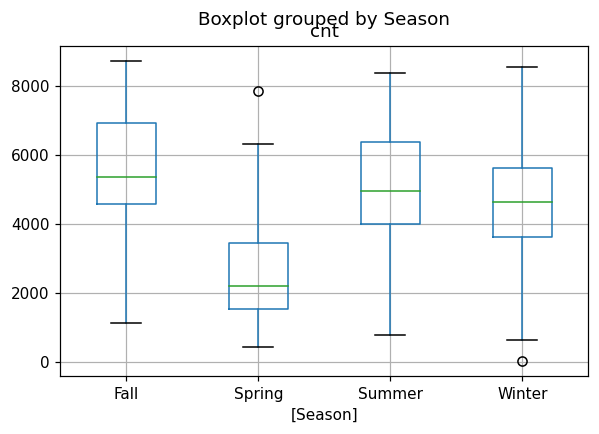

In [208]:
data.loc[: , ["cnt", "Season"]].boxplot(by="Season")

In [209]:
data.loc[:, ["Season"]].describe()

Season
count     731
unique      4
top      Fall
freq      188

In [210]:
data[data["Season"]=="Winter"].describe()

Temp   Feel_Temp         Hum        Wind       Casual  \
count  178.000000  178.000000  178.000000  178.000000   178.000000   
mean    11.876584   11.530321    0.670608   11.523637   729.112360   
std      5.068181    4.490177    0.133575    5.464839   606.318118   
min      2.379151    2.711911    0.333478    1.500244     2.000000   
25%      7.568738    7.881300    0.570729    7.125450   318.500000   
50%     11.230825   11.241494    0.661042   11.188028   544.500000   
75%     16.136474   15.648097    0.758229   15.249870   922.000000   
max     22.902500   20.574825    1.000000   28.292425  3031.000000   

        Registered          cnt  
count   178.000000   178.000000  
mean   3999.050562  4728.162921  
std    1444.782557  1699.615261  
min      20.000000    22.000000  
25%    2974.500000  3615.500000  
50%    3815.000000  4634.500000  
75%    5075.500000  5624.500000  
max    6946.000000  8555.000000

In [211]:
data[data["Season"]=="Fall"].describe()

Temp   Feel_Temp         Hum        Wind       Casual  \
count  188.000000  188.000000  188.000000  188.000000   188.000000   
mean    25.076954   22.827224    0.633482   11.530366  1202.611702   
std      3.472258    3.386635    0.119349    3.988275   595.975032   
min     14.050849    3.392800    0.360000    4.292744   118.000000   
25%     23.264776   21.071368    0.550833    8.781405   781.750000   
50%     25.467901   22.859025    0.635000   11.062705  1050.500000   
75%     27.250000   24.810359    0.712604   14.000136  1424.000000   
max     32.498349   31.522112    0.939565   25.166339  3160.000000   

        Registered          cnt  
count   188.000000   188.000000  
mean   4441.691489  5644.303191  
std    1304.626949  1459.800381  
min     889.000000  1115.000000  
25%    3477.250000  4586.500000  
50%    4110.500000  5353.500000  
75%    5667.750000  6929.250000  
max    6917.000000  8714.000000

In [212]:
data[data["Season"]=="Spring"].describe()

Temp   Feel_Temp         Hum        Wind       Casual  \
count  181.000000  181.000000  181.000000  181.000000   181.000000   
mean     6.054508    5.954955    0.588880   14.373984   334.928177   
std      4.877751    4.654205    0.157451    5.791401   387.655561   
min     -5.220871   -4.283729    0.000000    3.042356     9.000000   
25%      2.457500    2.919651    0.489167   10.391097   109.000000   
50%      5.512500    5.292587    0.554583   13.584250   218.000000   
75%      9.083466    8.904490    0.701667   16.958504   424.000000   
max     18.907500   17.784999    1.000000   34.000021  3155.000000   

        Registered          cnt  
count   181.000000   181.000000  
mean   2269.204420  2604.132597  
std    1200.269751  1399.942119  
min     416.000000   431.000000  
25%    1379.000000  1538.000000  
50%    1867.000000  2209.000000  
75%    3162.000000  3456.000000  
max    5315.000000  7836.000000

Explorando los datos de renta de bicicletas para cada estación del año, se puede ver que cada una tiene un compartamiento diferente, esto es medias y cuartiles diferentes. Por ejemplo, en primavera la media es la más baja de las 4 estaciones (2604.13), y tiene un outsider superior (7836). La media más alta se presenta en otoño (5644.30), y el outsider mínimo se puede encontar en invierno (22), podría tener sentido dadas las bajas temperaturas menos usuarios utilizarían el servicio.

Text(0.5, 1.0, 'Is it holiday?')

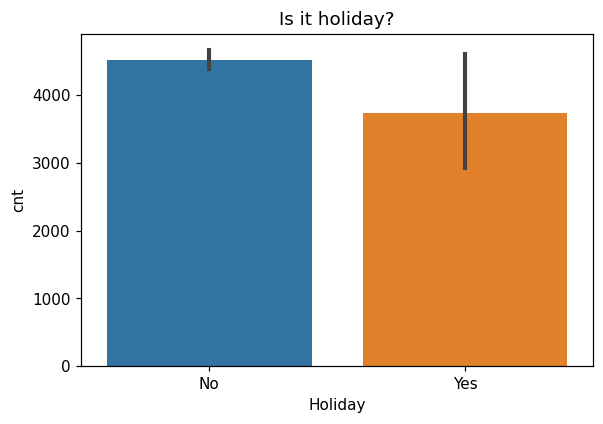

In [213]:
sns.barplot(data=data, x="Holiday", y="cnt")
plt.title('Is it holiday?')

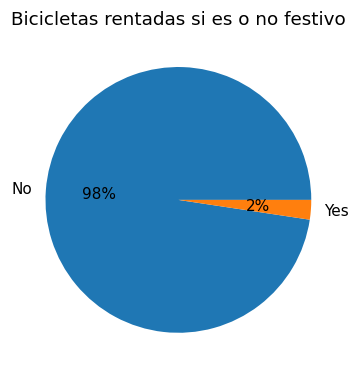

In [214]:
d = {'Holiday': ["No", "Yes"], 'total': [data[data["Holiday"]=="No"]["cnt"].sum(), data[data["Holiday"]=="Yes"]["cnt"].sum()]}
df_holiday = pd.DataFrame(data=d)
df_holiday

plt.pie(df_holiday.loc[:,"total"], labels = df_holiday.loc[:, "Holiday"], autopct='%.0f%%')
plt.title('Bicicletas rentadas si es o no festivo')
plt.show()

In [215]:
data[data["Holiday"]=="Yes"].describe()

Temp  Feel_Temp        Hum       Wind       Casual   Registered  \
count  21.000000  21.000000  21.000000  21.000000    21.000000    21.000000   
mean   13.855564  12.847942   0.614704  12.952396  1064.714286  2670.285714   
std     9.506918   8.545816   0.114579   5.337171   860.046809  1492.860246   
min     0.264151   0.308237   0.381304   2.834381   117.000000   573.000000   
25%     6.256651   5.839855   0.537500  10.125107   440.000000  1470.000000   
50%    10.016651  10.217576   0.605000  12.999139   874.000000  2549.000000   
75%    23.646651  21.405362   0.709583  15.500986  1514.000000  3603.000000   
max    29.090849  26.419839   0.790833  22.087555  3065.000000  5172.000000   

              cnt  
count    21.00000  
mean   3735.00000  
std    2103.35066  
min    1000.00000  
25%    1951.00000  
50%    3351.00000  
75%    6034.00000  
max    7403.00000

In [216]:
data[data["Holiday"]=="No"].describe()

Temp   Feel_Temp         Hum        Wind       Casual  \
count  710.000000  710.000000  710.000000  710.000000   710.000000   
mean    15.313778   14.337427    0.630469   12.756962   841.771831   
std      8.547031    7.633910    0.145335    5.191771   680.528529   
min     -5.220871   -4.283729    0.000000    1.500244     2.000000   
25%      8.068137    7.903296    0.520521    9.011098   314.250000   
50%     15.460826   15.015430    0.630000   12.083316   711.500000   
75%     22.706651   20.574672    0.732813   15.625589  1080.000000   
max     32.498349   31.522112    1.000000   34.000021  3410.000000   

        Registered          cnt  
count   710.000000   710.000000  
mean   3685.332394  4527.104225  
std    1553.704431  1929.013947  
min      20.000000    22.000000  
25%    2546.000000  3214.000000  
50%    3691.000000  4558.000000  
75%    4805.500000  5932.750000  
max    6946.000000  8714.000000

In [217]:
print("Total bicicletas rentadas para día festivo ", data[data["Holiday"]=="Yes"]["cnt"].sum())
print("Total bicicletas rentadas para No día festivo ", data[data["Holiday"]=="No"]["cnt"].sum())

Total bicicletas rentadas para día festivo  78435
Total bicicletas rentadas para No día festivo  3214244


Revisando el conteo de total de bicicletas alquiladas, al revisar si el día corresponde o no a un día festivo, se observa que es más frecuente en días no festivos, de hecho hay más datos de dias no festivos (710 vs 21) pero que en esos 21 días el promedio de bicicletas rentadas es de 3735 mientras que en día hábil esta en 4527, mostrando que aunque los festivos son menos días el uso en particular en esos días es considerable.

Text(0.5, 1.0, 'Descripción del clima')

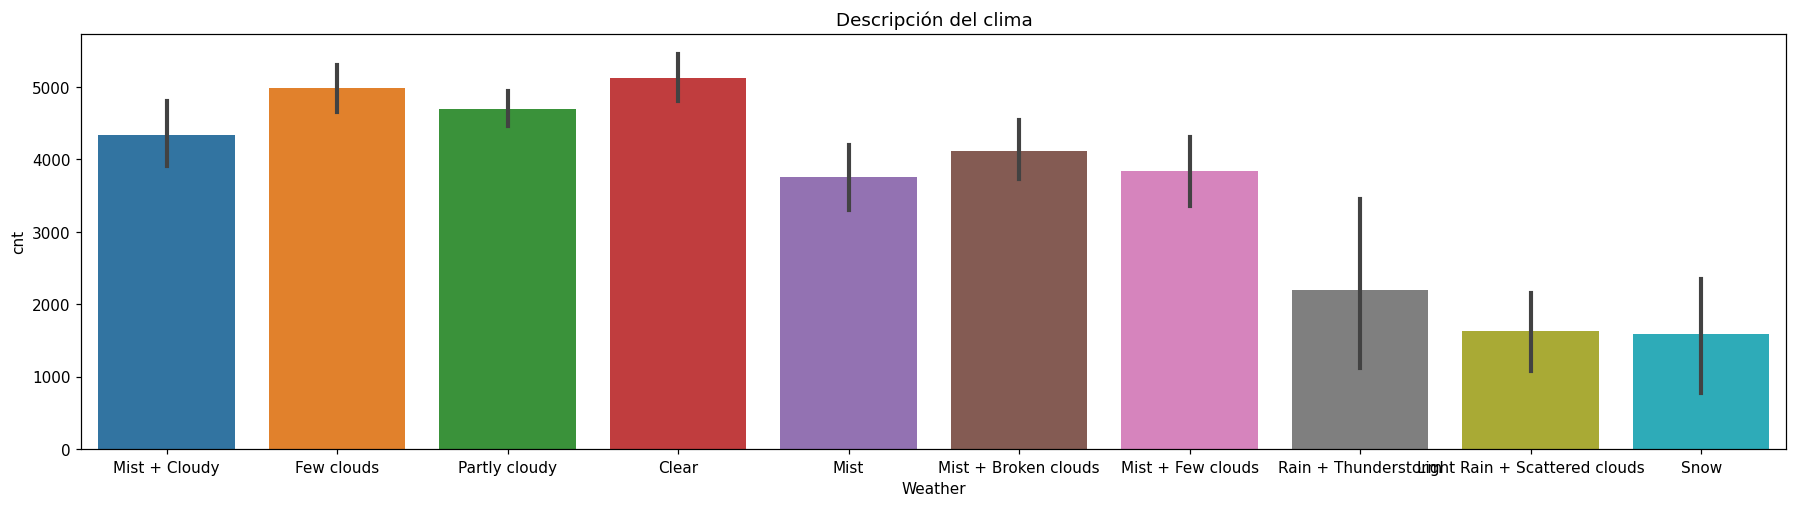

In [218]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(data=data, x="Weather", y="cnt")
plt.title('Descripción del clima')

In [219]:
data.loc[: , ["cnt", "Weather"]].groupby("Weather").sum().sort_values("cnt", ascending=False).rename(columns={"cnt":"Total bicicletas rentadas"}).iloc[0:10].reset_index()

Weather  Total bicicletas rentadas
0                  Partly cloudy                    1100272
1                     Few clouds                     588321
2                          Clear                     569359
3                  Mist + Cloudy                     286658
4           Mist + Broken clouds                     284035
5              Mist + Few clouds                     223002
6                           Mist                     203163
7            Rain + Thunderstorm                      15338
8  Light Rain + Scattered clouds                      13018
9                           Snow                       9513

El clima que más cantidad de bicicletas rentadas corresponde a un clima parcialmente nublado, se guido de pocas nubes y de despejado. El clima menos favorable es cuando hay nieve.

Si se hace la agrupación por los 3 grupos sugeridos por el meteorólogo:



In [262]:
def group_weather(Weather):
  if Weather == 'Mist + Cloudy':
    return 'Neblina'
  elif Weather == 'Mist':
    return 'Neblina'
  elif Weather == 'Mist + Broken clouds':
    return 'Neblina'
  elif Weather == 'Mist + Few clouds':
    return 'Neblina'
  elif Weather == 'Rain + Thunderstorm':  
    return 'Precipitaciones'
  elif Weather == 'Light Rain + Scattered clouds':  
    return 'Precipitaciones'
  elif Weather == 'Snow':  
    return 'Precipitaciones'
  else:
    return 'Otro'

Text(0.5, 1.0, 'Descripción del clima')

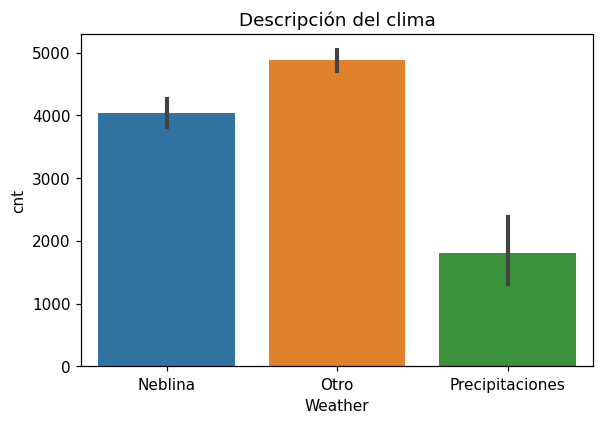

In [263]:
dfWeather= data.copy()
dfWeather['Weather']=dfWeather['Weather'].apply(group_weather)
sns.barplot(data=dfWeather, x="Weather", y="cnt")
plt.title('Descripción del clima')

In [264]:
dfWeather.loc[: , ["cnt", "Weather"]].groupby("Weather").sum().sort_values("cnt", ascending=False).rename(columns={"cnt":"Total bicicletas rentadas"}).iloc[0:10].reset_index()

Weather  Total bicicletas rentadas
0             Otro                    2257952
1          Neblina                     996858
2  Precipitaciones                      37869

De acuerdo a la agrupación sugerida, se reafirma que clima en el que no hay precipitaciones o neblina es el clima más propicio para el alquiler de las bicicletas.

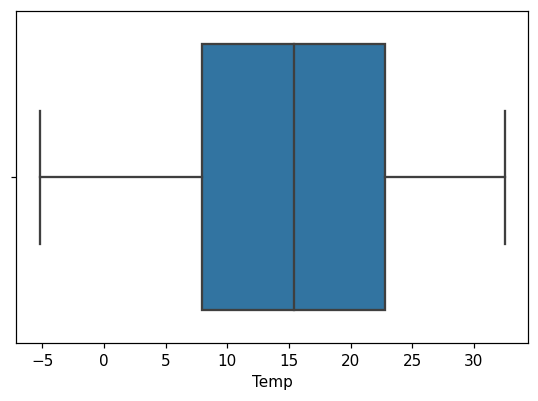

In [220]:
sns.boxplot(x=data["Temp"])

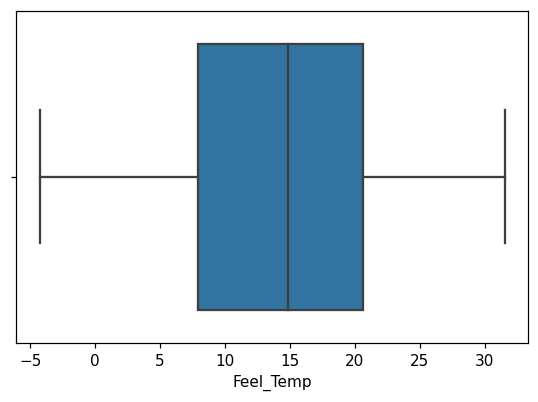

In [221]:
sns.boxplot(x=data["Feel_Temp"])

In [222]:
data.loc[: , ["Temp", "Feel_Temp"]].describe()

Temp   Feel_Temp
count  731.000000  731.000000
mean    15.271887   14.294637
std      8.572390    7.659175
min     -5.220871   -4.283729
25%      7.921250    7.878597
50%     15.421651   14.876451
75%     22.765425   20.604294
max     32.498349   31.522112

Respecto a los datos de las variables de temperatura y sensación de temperaursa, se ven datos muy similares, no extremos siginficativos, los valores negativos en este caso son aceptables.

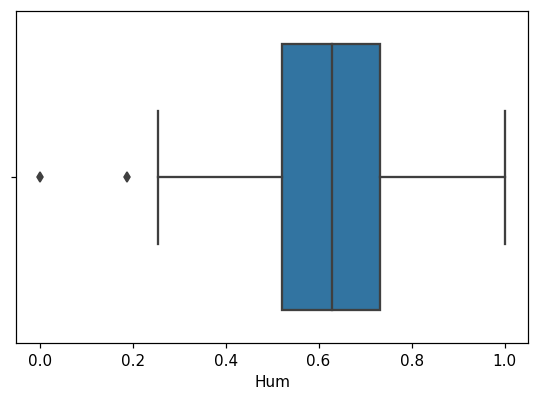

In [223]:
sns.boxplot(x=data["Hum"])

Luego de corregir los valores extremos, con la visualización se puede ver como efectivamente estan lso datos normalizados, y que se tienen algunos dados entre 0 y el Q1 de la humedad.

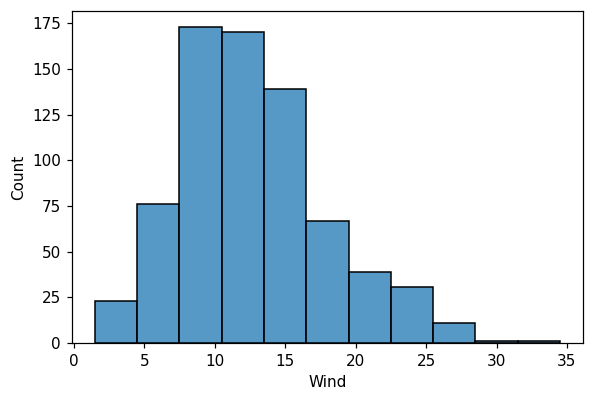

In [224]:
sns.histplot(data=data, x="Wind", binwidth=3)

Con la visualización se confirma los valores negativos que ya se habian identificado con el pandas profiling, así como que los datos más frecuentes de velocidad del viento es de 12 m/s.

In [225]:
data.loc[: , ["Casual", "Registered"]].describe()

Casual   Registered
count   731.000000   731.000000
mean    848.176471  3656.172367
std     686.622488  1560.256377
min       2.000000    20.000000
25%     315.500000  2497.000000
50%     713.000000  3662.000000
75%    1096.000000  4776.500000
max    3410.000000  6946.000000

Respecto a usuarios casuales y registrados, hay un mayor uso de usuarios registrados.

# **Modelamiento**

In [227]:
data.head()

day month  year  Season Holiday        Weather      Temp  Feel_Temp  \
0   1    01  2020  Spring      No  Mist + Cloudy  8.175849   9.090375   
1   2    01  2020  Spring      No  Mist + Cloudy  9.083466   8.625733   
2   3    01  2020  Spring      No     Few clouds  1.229108   0.902035   
3   4    01  2020  Spring      No     Few clouds  1.400000   1.969734   
4   5    01  2020  Spring      No  Partly cloudy  2.666979   2.775690   

        Hum       Wind  Casual  Registered   cnt  
0  0.805833  10.749882     331         654   985  
1  0.696087  16.652113     131         670   801  
2  0.437273  16.636703     120        1229  1349  
3  0.590435  10.739832     108        1454  1562  
4  0.436957  12.522300      82        1518  1600

Se requiere pasar las variables categóricas a numero antes de aplciar el modelamiento, para esto se deben transformar Holiday, Season y Weather.


In [265]:
def enconderF(df2):
  #encoder Holiday
  df2['Holiday'] = df2['Holiday'].replace({
      'No': 0,
      'Yes': 1
  })

  #encoder Weather, primero aplicar el agrupamiento sugerido por el metereologo: 
  df2['Weather']=df2['Weather'].apply(group_weather)
  df2 = pd.get_dummies(df2,columns=['Weather'],drop_first = True)

  #encoder para season
  df2 = pd.get_dummies(df2,columns=['Season'],drop_first = True)
  
  return df2

Se dividen los datos de entrenamiento y evaluación, en una proporcion 80-20.

In [266]:
train, test = train_test_split(data, test_size=0.2, random_state=33)
train.head()

day month  year  Season Holiday               Weather       Temp  \
630  22    09  2021    Fall      No         Partly cloudy  22.550000   
192  12    07  2020    Fall      No            Few clouds  29.325849   
275   3    10  2020  Winter      No  Mist + Broken clouds  10.055849   
367   3    01  2021  Spring      No         Partly cloudy  -0.950000   
296  24    10  2020  Winter      No                 Clear  13.776651   

     Feel_Temp       Hum       Wind  Casual  Registered   cnt  
630  20.692936  0.646667  19.000061    2512        5883  8395  
192  26.745925  0.559167  13.417018     662        3596  4258  
275  10.426162  0.760833   5.584169     330        3240  3570  
367  -2.065075  0.441250  24.499957      89        2147  2236  
296  13.482149  0.772083   7.959064     699        3488  4187

In [267]:
print(train.shape)
print(test.shape)

(584, 13)
(147, 13)


Aplciamos la transformación de variables categóricas a los datos:

In [268]:
x_train, y_train = train.drop(['cnt'],axis=1), train['cnt'] 
x_test, y_test = test.drop(['cnt'],axis=1), test['cnt'] 

x_train

day month  year  Season Holiday               Weather       Temp  \
630  22    09  2021    Fall      No         Partly cloudy  22.550000   
192  12    07  2020    Fall      No            Few clouds  29.325849   
275   3    10  2020  Winter      No  Mist + Broken clouds  10.055849   
367   3    01  2021  Spring      No         Partly cloudy  -0.950000   
296  24    10  2020  Winter      No                 Clear  13.776651   
..   ..   ...   ...     ...     ...                   ...        ...   
658  20    10  2021  Winter      No         Partly cloudy  14.755849   
578   1    08  2021    Fall      No                 Clear  25.722500   
728  29    12  2021  Spring      No                  Mist   3.906651   
391  27    01  2021  Spring      No     Mist + Few clouds  11.975000   
20   21    01  2020  Spring      No         Partly cloudy   0.342500   

     Feel_Temp       Hum       Wind  Casual  Registered  
630  20.692936  0.646667  19.000061    2512        5883  
192  26.745925  0.559167  13.417018     662        3596  
275  10.426162  0.760833   5.584169     330        3240  
367  -2.065075  0.441250  24.499957      89        2147  
296  13.482149  0.772083   7.959064     699        3488  
..         ...       ...        ...     ...         ...  
658  14.223574  0.572917   7.874979    2806        5284  
578  23.363476  0.677500   9.458993    1074        6506  
728   3.392800  0.752917   8.333661     159        1182  
391  11.523001  0.741250  22.958689     269        3187  
20   -0.581849  0.457083  23.667214      75        1468  

[584 rows x 12 columns]

In [269]:
x_train_enc=enconderF(x_train)
x_test_enc=enconderF(x_test)
x_train_enc

day month  year  Holiday       Temp  Feel_Temp       Hum       Wind  \
630  22    09  2021        0  22.550000  20.692936  0.646667  19.000061   
192  12    07  2020        0  29.325849  26.745925  0.559167  13.417018   
275   3    10  2020        0  10.055849  10.426162  0.760833   5.584169   
367   3    01  2021        0  -0.950000  -2.065075  0.441250  24.499957   
296  24    10  2020        0  13.776651  13.482149  0.772083   7.959064   
..   ..   ...   ...      ...        ...        ...       ...        ...   
658  20    10  2021        0  14.755849  14.223574  0.572917   7.874979   
578   1    08  2021        0  25.722500  23.363476  0.677500   9.458993   
728  29    12  2021        0   3.906651   3.392800  0.752917   8.333661   
391  27    01  2021        0  11.975000  11.523001  0.741250  22.958689   
20   21    01  2020        0   0.342500  -0.581849  0.457083  23.667214   

     Casual  Registered  Weather_Otro  Weather_Precipitaciones  Season_Spring  \
630    2512        5883             1                        0              0   
192     662        3596             1                        0              0   
275     330        3240             0                        0              0   
367      89        2147             1                        0              1   
296     699        3488             1                        0              0   
..      ...         ...           ...                      ...            ...   
658    2806        5284             1                        0              0   
578    1074        6506             1                        0              0   
728     159        1182             0                        0              1   
391     269        3187             0                        0              1   
20       75        1468             1                        0              1   

     Season_Summer  Season_Winter  
630              0              0  
192              0              0  
275              0              1  
367              0              0  
296              0              1  
..             ...            ...  
658              0              1  
578              0              0  
728              0              0  
391              0              0  
20               0              0  

[584 rows x 15 columns]

In [270]:
print(x_train_enc.shape)
print(x_test_enc.shape)

(584, 15)
(147, 15)


##a) Regresión lineal simple. 

In [271]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_enc, y_train)
lin_reg.intercept_, lin_reg.coef_

(1.1805241229012609e-09,
 array([ 1.27872192e-14,  1.58317803e-13, -5.85251398e-13, -8.15348630e-14,
         1.43503265e-13, -1.68344505e-13, -4.71198059e-13, -2.88033486e-14,
         1.00000000e+00,  1.00000000e+00,  7.32031623e-15, -4.35650864e-14,
        -5.20000709e-14, -6.74628539e-14, -4.10277281e-14]))

In [272]:
y_pred_train = lin_reg.predict(x_train_enc)

In [273]:
y_pred_test = lin_reg.predict(x_test_enc)

In [274]:
#Función para ver los resultados de las métricas de un modelo entrenamiento y validación
def metricsPrint (titulo, X_train, y_train, y_pred_train, X_val, y_val, y_pred_val):
  n,p = X_train.shape

  print('------------ Regresión ', titulo,' con data entrenamiento------------')
  print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_train,y_pred_train))
  print("R2-score: %.5f" % r2_score(y_train, y_pred_train) )
  print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1)) )

  n,p = X_val.shape

  print('------------ Regresión ', titulo, ' con data test ------------')
  print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_val,y_pred_val))
  print("R2-score: %.5f" % r2_score(y_val, y_pred_val) )
  print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_val, y_pred_val))*(n-1)/(n-p-1)) )

In [275]:
metricsPrint ('Regresion Lineal', x_train_enc, y_train, y_pred_train, x_test_enc, y_test, y_pred_test)

------------ Regresión  Regresion Lineal  con data entrenamiento------------
Residual sum of squares (MSE): 0.00
R2-score: 1.00000
Adj R2-score: 1.00000
------------ Regresión  Regresion Lineal  con data test ------------
Residual sum of squares (MSE): 0.00
R2-score: 1.00000
Adj R2-score: 1.00000


##b) Regresión Polinomial

Aplicamos una tranformación a polinomio grado 5

In [292]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
x_poly_train = poly_features.fit_transform(x_train_enc)
dataset = pd.DataFrame(x_poly_train)
x_poly_train.shape

(584, 15503)

In [293]:
lin_regP = LinearRegression()
lin_regP.fit(x_poly_train, y_train)

LinearRegression()

In [294]:
y_pred_train = lin_regP.predict(x_poly_train)

In [295]:
x_poly_test = poly_features.fit_transform(x_test_enc)
y_pred_test = lin_regP.predict(x_poly_test)

In [296]:
metricsPrint ('Regresion Polinomial P=2', x_poly_train, y_train, y_pred_train, x_poly_test, y_test, y_pred_test)

------------ Regresión  Regresion Polinomial P=2  con data entrenamiento------------
Residual sum of squares (MSE): 0.00
R2-score: 1.00000
Adj R2-score: 1.00000
------------ Regresión  Regresion Polinomial P=2  con data test ------------
Residual sum of squares (MSE): 6.36
R2-score: 1.00000
Adj R2-score: 1.00000


##c) Regresión Polinomial y regularización

Aplicamos una tranformación a polinomio grado 2

In [297]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly_train = poly_features.fit_transform(x_train_enc)
dataset = pd.DataFrame(x_poly_train)
x_poly_train.shape

(584, 135)

Se escoge utilizar una regularización Lasso, con valor de alfa 50

In [298]:
LassoModel = Lasso(alpha=50)
LassoModel.fit(x_poly_train, y_train)

Lasso(alpha=50)

Evaluación:

In [299]:
y_pred_lass_train = LassoModel.predict(x_poly_train)

In [300]:
x_poly_test = poly_features.fit_transform(x_test_enc)
y_pred_lass_test = LassoModel.predict(x_poly_test)

In [301]:
metricsPrint ('Regresion Lasso alfa = 50', x_poly_train, y_train, y_pred_lass_train, x_poly_test, y_test, y_pred_lass_test)

------------ Regresión  Regresion Lasso alfa = 50  con data entrenamiento------------
Residual sum of squares (MSE): 4.53
R2-score: 1.00000
Adj R2-score: 1.00000
------------ Regresión  Regresion Lasso alfa = 50  con data test ------------
Residual sum of squares (MSE): 4.85
R2-score: 1.00000
Adj R2-score: 0.99998


##d) Evaluación de modelos:

In [303]:
columnas = ['a.Reg.lineal', 'b.RegPolinomial',	'c.RegPoliLasso'] # definimos los nombres de las columnas
filas = ['MSE Train', 'MSE Test', 'R2-score Train', 'R2-score Test'] # definimos los nombres de las filas

datos = [
        ['0.00','0.00','4.53'],
        ['0.00','6.36','4.85'],
        ['1.00','1.00','1.00'],
        ['1.00','1.00','1.00']
        ]


table = pd.DataFrame(datos, columns=columnas, index=filas)

table.head(4)

a.Reg.lineal b.RegPolinomial c.RegPoliLasso
MSE Train              0.00            0.00           4.53
MSE Test               0.00            6.36           4.85
R2-score Train         1.00            1.00           1.00
R2-score Test          1.00            1.00           1.00

En los tres casos la comparación del R2-Score es 1 para la data de evaluación, por lo que guiados por el MSE solo el primer modelo presenta el menor error, y dado esto es el criterio para escogerlo como el mejor modelo.

No es común obterner una cifra tan "perfecta" tanto en test como en evaluación, puso suceder posiblemente porque muchos datos rondaban la media y el manejo que se dio a los outliers, aunque no fueron muchos valores.


##e) Interpretación del modelo:

In [304]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_enc, y_train)
lin_reg.intercept_, lin_reg.coef_

(1.1805241229012609e-09,
 array([ 1.27872192e-14,  1.58317803e-13, -5.85251398e-13, -8.15348630e-14,
         1.43503265e-13, -1.68344505e-13, -4.71198059e-13, -2.88033486e-14,
         1.00000000e+00,  1.00000000e+00,  7.32031623e-15, -4.35650864e-14,
        -5.20000709e-14, -6.74628539e-14, -4.10277281e-14]))

In [305]:
y_pred_train = lin_reg.predict(x_train_enc)

In [306]:
y_pred_test = lin_reg.predict(x_test_enc)

In [311]:
print(f'Intercepto: {lin_reg.intercept_}')

Intercepto: 1.1805241229012609e-09


In [319]:
coef = list(zip(['Intercepto'] + list(x_test_enc.columns), [lin_reg.intercept_] + list(lin_reg.coef_)))
coef = pd.DataFrame(coef,columns=['Variable','Parámetro'])
coef

Variable     Parámetro
0                Intercepto  1.180524e-09
1                       day  1.278722e-14
2                     month  1.583178e-13
3                      year -5.852514e-13
4                   Holiday -8.153486e-14
5                      Temp  1.435033e-13
6                 Feel_Temp -1.683445e-13
7                       Hum -4.711981e-13
8                      Wind -2.880335e-14
9                    Casual  1.000000e+00
10               Registered  1.000000e+00
11             Weather_Otro  7.320316e-15
12  Weather_Precipitaciones -4.356509e-14
13            Season_Spring -5.200007e-14
14            Season_Summer -6.746285e-14
15            Season_Winter -4.102773e-14

In [318]:
coef['Parámetro'].max()

1.0000000000000007

¿Cuáles son las 3 variables más importantes para la predicción de la cantidad de
usuarios?

Las variables 3 más importantes corresponde a que el usuario esté registrado, el mes del año y la temperatura.

Text(0.5, 1.0, 'Cantidad de bicicletas rentadas por mes')

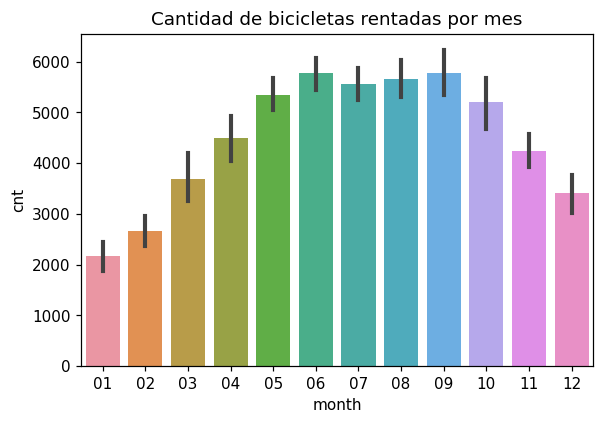

In [322]:
sns.barplot(data=data, x="month", y="cnt")
plt.title('Cantidad de bicicletas rentadas por mes')

In [323]:
data.loc[: , ["cnt", "month"]].groupby("month").sum().sort_values("cnt", ascending=False).rename(columns={"cnt":"Total bicicletas rentadas"}).iloc[0:5].reset_index()

month  Total bicicletas rentadas
0    08                     351194
1    06                     346342
2    09                     345991
3    07                     344948
4    05                     331686

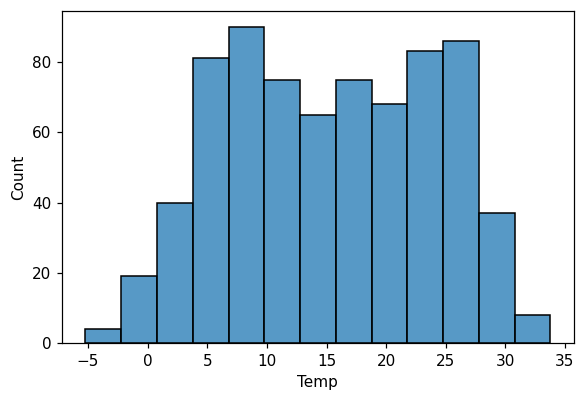

In [324]:
sns.histplot(data=data, x="Temp", binwidth=3)

In [325]:
data.loc[: , ["cnt", "Temp"]].groupby("Temp").sum().sort_values("cnt", ascending=False).rename(columns={"cnt":"Total bicicletas rentadas x temperatura"}).iloc[0:5].reset_index()

Temp  Total bicicletas rentadas x temperatura
0  15.421651                                    26870
1  18.515849                                    26439
2  21.845000                                    26012
3  22.510849                                    24216
4  16.165849                                    22963

Describa cual es el escenario ideal para el incremento de usuarios:

El escenario ideal es buscar incrementar usuarios registrados, para que se motiven a usar el servicio entre junio y septiembre, con temperaturas entre los 15.42 y 22.51 grados celcius.

Lo que sugiere que una campaña de marketing en verano podría atraer mayor cantidad de público para el nuevo servicio de patinetas electricas.

¿Qué pasos adicionales deberían tener en cuenta para una próxima
iteración/mejora del modelo?

Aumentar más datos, posiblemente dar otro manejo a la fecha.